In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
from itertools import product
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import os

%matplotlib inline

In [2]:
# Attribute Information: (classes: edible=e, poisonous=p)
# cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
# cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
# bruises: bruises=t,no=f
# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
# gill-attachment: attached=a,descending=d,free=f,notched=n
# gill-spacing: close=c,crowded=w,distant=d
# gill-size: broad=b,narrow=n
# gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
# stalk-shape: enlarging=e,tapering=t
# stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
# stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
# stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
# stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
# stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
# veil-type: partial=p,universal=u
# veil-color: brown=n,orange=o,white=w,yellow=y
# ring-number: none=n,one=o,two=t
# ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
# spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
# population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
# habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

file_path = os.getcwd() + "\\mushrooms.csv"   # get data path
df = pd.read_csv(file_path, header=None)              # read in csv to dataframe
df.columns = ['class','cap-shape','cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size','gill-color','stalk-shape',
    'stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
    'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color',
    'population','habitat'
    ]
df.drop(['stalk-root'],axis=1, inplace=True)  # a third of this column is missing so I drop it entirely
df = df.iloc[1:,:]                            # remove the first row because it contains the column labels

# below I one hot encode the features, because the make no sense as an ordinal variables
df = pd.concat([df.iloc[:,0], pd.get_dummies(df.iloc[:,1:])], axis =1 )

df = df.replace(to_replace = 'p', value = 0)  # replace 'poisonous' label with 0
df = df.replace(to_replace = 'e', value = 1)  # replace 'edible' label with 1
df.head(20)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
1,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [3]:
X = df.iloc[:, 1:] # X is my feature vector, I exlude the target variable
y = df.iloc[:, 0]  # y is my target variable, poisonous or not

# Split my data into testing and taining
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
print(X_train.shape, X_test.shape) # Now we have blown up a mushroom into a vect in 112 dimensional mushroom space!

(6499, 112) (1625, 112)


In [4]:
# Rectified Linear Unit (ReLU) activation function
def Relu(Z):
    return np.maximum(0,Z)

# derivative of ReLU
def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def dRelu2(dZ, Z):    
    dZ[Z <= 0] = 0    
    return dZ

# Activation function for output
def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

# derivative of sigmoid
def dSigmoid(Z):
    s = 1/(1+np.exp(-Z))
    dZ = s * (1-s)
    return dZ

# Class definition of shroomNet
class shroom_net:
    def __init__(self, x, y, learn_rate = 0.003):
        x = np.array(x)
        x = np.transpose(x)
        y = np.array(y)
        self.X = x                            # training input vector size
        self.Y = y                            # training output vector predicted labels
        self.Yh = np.zeros(self.Y.shape[0])   # actual outputs of the NN 
        self.L = 2                    # number of layers in our NN
        self.dims = [112, 15, 1]      # dimensions of layers: 112 inputs, 8 units (hidden), 1 output unit
        self.param = {}  
        self.ch = {}                  # dictionary to store intermediate results of forward pass for backprop use
        self.grad = {}
        self.loss = []
        self.train_acc = []
        self.lr = learn_rate          # learning rate (eta)
        self.sam = self.Y.shape[0]    # number of training samples to use
        self.threshold = 0.5          # used later for assigning prediction to label

    # initialize the network weights with random values
    # W1 is vector of weights for layer 1; W2 is vector of weights for layer 2
    def nInit(self):    
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
        self.param['b1'] = np.zeros((self.dims[1], 1))        
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
        self.param['b2'] = np.zeros((self.dims[2], 1))                
        return
        
    # forward pass of the NN
    def forward(self):
        Z1 = self.param['W1'].dot(self.X) + self.param['b1'] # score is calculated z1 = W dot X + B
        A1 = Relu(Z1)                                        # pass score through relu   
        self.ch['Z1'],self.ch['A1']=Z1, A1                   # store these results for later backprop
        Z2 = self.param['W2'].dot(A1) + self.param['b2']     # preactivation 2 calculated
        A2 = Sigmoid(Z2)                                     # run through sigmoid function
        self.ch['Z2'],self.ch['A2']=Z2,A2                    # again, store intermediate results of hidden layer
        self.Yh = A2                                         # final outputs stored in Yh
        loss=self.nloss(A2)                                  # calculate loss on final output, then return
        return self.Yh, loss
        
    # would use Mean Squared Error Loss as follows for regression but for
    # binary classification this is not what we want
    # def nloss(self,Yh):       
    #    squared_errors = (self.Yh - self.Y) ** 2
    #    self.Loss= np.sum(squared_errors)
    #    return self.loss

    # compute the Cross-Entropy Loss
    def nloss(self,Yh):
        loss = (1./self.sam) * (-np.dot(self.Y, np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))    
        return loss   
    
    # backward pass
    def backward(self):
        # remember that we want partial deriv of w_i with respect to cost for all w_i in W...
        # if Loss = -(Y log Yh + (1-Y) Log(1 - Yh))
        # then d(Loss wrt Yh) = -(Y/Yh - (1-Y)/(1-Yh))
        dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))
        
        dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])    
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        dLoss_W2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
        dLoss_b2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 
                            
        dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])        
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
        dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  
        
        # we know which direction to climb in the blind fog, now climb:
        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1 # adjust weights between input and hidden
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2 # adjust weights between hidden and output
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2 

    def pred(self, x, y): 
        x = np.array(x)
        x = np.transpose(x)
        y = np.array(y)
        self.X=x
        self.Y=y
        comp = np.zeros(x.shape[1])
        pred, loss= self.forward()
        
        for i in range(0, pred.shape[1]):                    #sigmoid outputs floats, convert to binary class
            if pred[0,i] > self.threshold: comp[i] = 1  
            else: comp[i] = 0
        comp = [1 if x > self.threshold else 0 for x in comp] #sigmoid outputs floats, convert to binary class
    
        print("Validation Acc: " + str(np.sum((comp == y)/x.shape[1])))
        
        return comp
    
    def fit(self,X, Y, epoch = 2000):
        np.random.seed(1)                         
    
        self.nInit()
    
        for i in range(0, epoch):
            Yh, loss = self.forward()
            self.backward()
        
            if i % 500 == 0:
                print ('Cost after iteration {}: {}'.format(i, loss))
                self.loss.append(loss)
                preds = [1 if x > self.threshold else 0 for x in Yh[0]] #sigmoid outputs floats, convert to binary class
                acc = np.sum((preds == Y)/len(preds))
                print('Training Acc: {}'.format(acc))
                self.train_acc.append(acc)

        plt.plot(np.squeeze(self.loss), label = 'loss')
        plt.plot(np.squeeze(self.train_acc), label="train acc")
        plt.ylabel('Loss and Training Accuracy')
        plt.xlabel('Iter / 500')
        plt.title("Learning Rate = " + str(self.lr))
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.show()
        
    
        return 
        

Cost after iteration 0: [0.68424887]
Training Acc: 0.5362363440529312
Cost after iteration 500: [0.02366719]
Training Acc: 0.9967687336513309
Cost after iteration 1000: [0.00971636]
Training Acc: 0.9989229112171103
Cost after iteration 1500: [0.00545996]
Training Acc: 0.9999999999999999


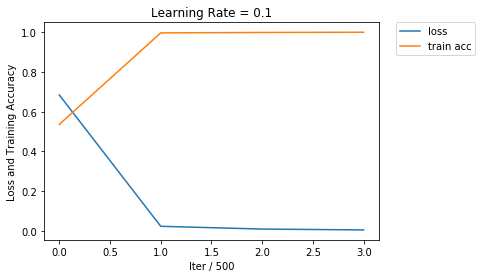

In [5]:

model = shroom_net(X_train, y_train, .1)
model.fit(X_train, y_train)

In [6]:
preds = model.pred(X_test, y_test)

Validation Acc: 1.0000000000000002


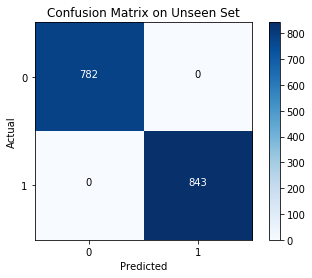

In [7]:

# method to plot a confusion matrix
def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    thresh = cf.max() / 2.
    for i,j in product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
    plt.show();
    
plotCf(y_test, preds,'Confusion Matrix on Unseen Set')